# Exploratory Data Analysis (EDA)

Этот ноутбук содержит анализ данных.
Датасет: `data_ml_v2-06.csv`.
Цель:
- изучить данные;
- описать характеристики данных;
- подготовить выводы для дальнейшей работы;

## Шаг 0: Импортирование библиотек

Импортируем библиотеки для работы с данными и визуализации

- `pandas`: работа с DataFrame;
- `numpy`: числовые операции;
- `matplotlib` и `seaborn`: визуализация;

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Настройка стиля графиков
sns.set_style('whitegrid')

## Шаг 1: Загрузка данных

Загружаем датасет из папки `data`. Датасет содержит три колонки: `x1` (признак 1), `x2` (признак 2) и `label` (целевая метка класса)

In [37]:
df = pd.read_csv('../data/data_ml_v2-06.csv')
df.head(10)

,x1,x2,label
0,2.09900,1.18550,1
1,4.08970,2.34480,1
2,2.29870,1.53440,1
3,2.31340,0.83835,1
4,2.77860,0.52184,1
5,3.03960,2.87770,1
6,1.46460,0.25633,1
7,2.35690,1.21610,1
8,0.30521,0.75321,1
9,2.47460,1.26010,1


## Шаг 2: Описание данных

Выводим информацию о данных:
- **Объём выборки**: Количество строк и столбцов;
- **Число признаков**: Колонки `x1` и `x2` (2 признака);
- **Типы данных и пропуски**: Проверяем, всё ли числовое и есть ли NaN;
- **Статистика**: Среднее, мин/макс, квартили для `x1`, `x2` и `label`;

In [38]:
# Общая информация
print("Объём выборки (строк, столбцов):", df.shape)
print(f"Число признаков: {len(df.columns) - 1}: {[x for x in df.columns[:len(df.columns) - 1]]}")

# Типы данных и пропуски
print("Информация о данных:")
df.info()

# Пропуски
print("Пропуски:")
print(df.isnull().sum())

# Статистическая сводка
print("Статистическая сводка:")
print(df.describe())

Объём выборки (строк, столбцов): (500, 3)
Число признаков: 2: ['x1', 'x2']
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   label   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
Пропуски:
x1       0
x2       0
label    0
dtype: int64
Статистическая сводка:
               x1          x2       label
count  500.000000  500.000000  500.000000
mean     2.478392    3.423390    2.500000
std      1.451113    1.767183    1.025721
min     -1.990600   -1.310200    1.000000
25%      1.448675    2.326900    2.000000
50%      2.486200    3.685400    2.500000
75%      3.635825    4.709900    3.000000
max      5.690000    7.237900    4.000000


## Шаг 3: Визуализация распределений

### 3.1 Гистограммы для `x1` и `x2` показывают их распределения. Это помогает понять:
- Нормальность (или асимметрию);
- Возможные выбросы;
- Диапазон значений;

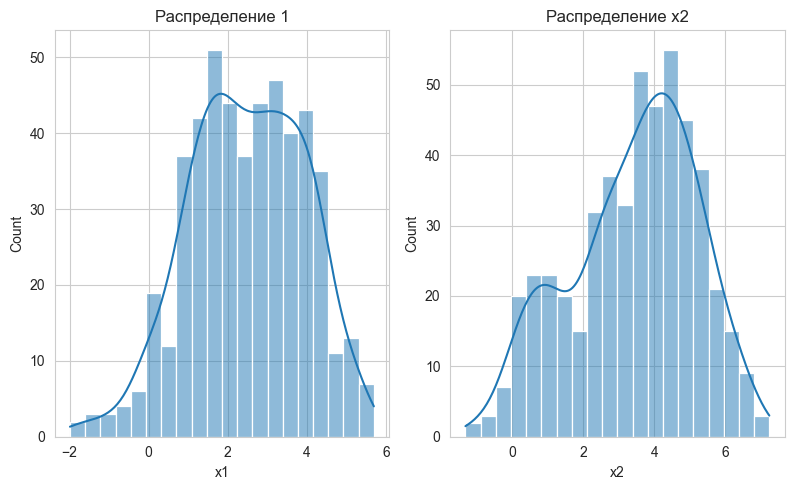

In [39]:
# Гистограммы
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['x1'], bins=20, kde=True)
plt.title("Распределение 1")

plt.subplot(1, 3, 2)
sns.histplot(df['x2'], bins=20, kde=True)
plt.title("Распределение x2")

plt.tight_layout()
plt.show()

### 3.2 Scatter plot (x1 vs x2)

Scatter plot показывает зависимость `x2` от `x1` с раскраской цветом `label`. Для классификации  идеально, если точки образуют визуально разделимые классы.

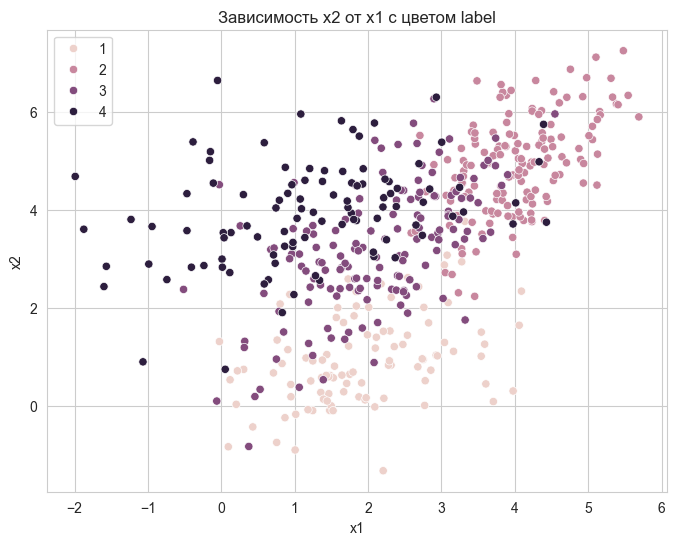

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])
plt.title("Зависимость x2 от x1 с цветом label")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### 3.3 Box plots для выбросов
#### 3.3.1 Визуализация

Box plots помогают выявить выбросы в `x1` и `x2`. Выбросы — значения, выходящие за пределы `1.5*IQR` (межквартильного размаха)

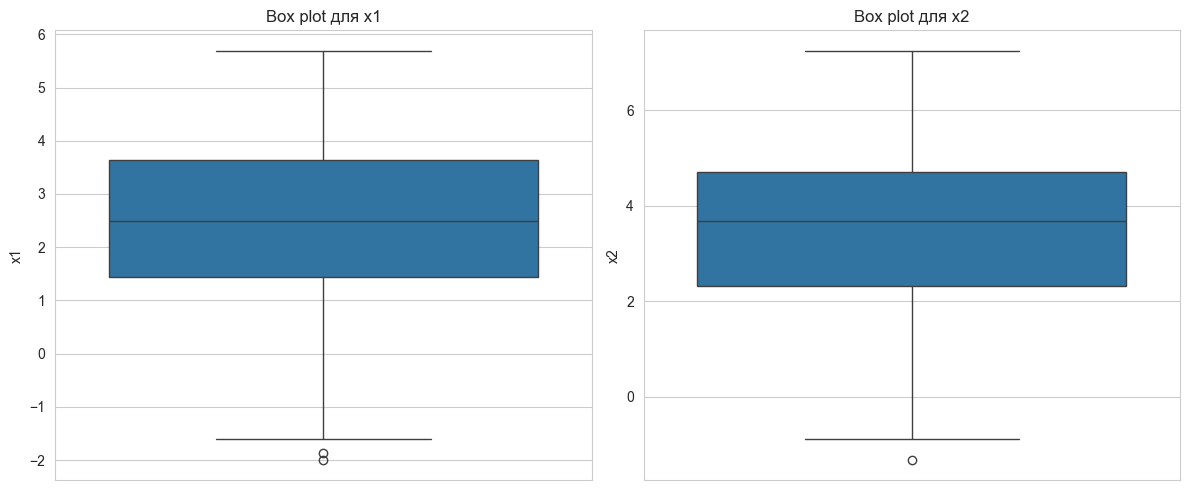

In [41]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['x1'])
plt.title("Box plot для x1")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['x2'])
plt.title("Box plot для x2")

plt.tight_layout()
plt.show()

#### 3.3.2 Используем IQR для выявления и фильтрации выбросов в 'x1' и 'x2'

In [42]:
def find_and_del_outliers(col_name, data):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]

    print(f"Выбросы в y (IQR метод):")
    print(outliers)

    new_df = data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]
    print(f"Размер данных после удаления выбросов: {new_df.shape}")

    return new_df

In [43]:
df_clean = find_and_del_outliers('x1', df)
print()
df_clean = find_and_del_outliers('x2', df_clean)

Выбросы в y (IQR метод):
         x1      x2  label
439 -1.8735  3.6047      4
442 -1.9906  4.6795      4
Размер данных после удаления выбросов: (498, 3)

Выбросы в y (IQR метод):
        x1      x2  label
12  2.2061 -1.3102      1
Размер данных после удаления выбросов: (497, 3)


## Шаг 4: Анализ баланса классов

### 4.1 Абсолютное и относительное распределение классов
Смотрим количество данных в каждом классе (абсолютное) и считаем их процент относительно всех элементов (относительное)

In [44]:
class_distribution = df_clean['label'].value_counts().sort_index()
class_percentage = df_clean['label'].value_counts(normalize=True).sort_index() * 100

print("Распределение классов:")
print(class_distribution)
print("\nПроцентное распределение:")
print(class_percentage.round(2))

# Или в одной таблице
summary = pd.DataFrame({
    'Количество': class_distribution,
    'Процент': class_percentage.round(2)
})
print(summary)

Распределение классов:
label
1     99
2    150
3    150
4     98
Name: count, dtype: int64

Процентное распределение:
label
1    19.92
2    30.18
3    30.18
4    19.72
Name: proportion, dtype: float64
       Количество  Процент
label                     
1              99    19.92
2             150    30.18
3             150    30.18
4              98    19.72


# 4.2 Визуализация баланса классов

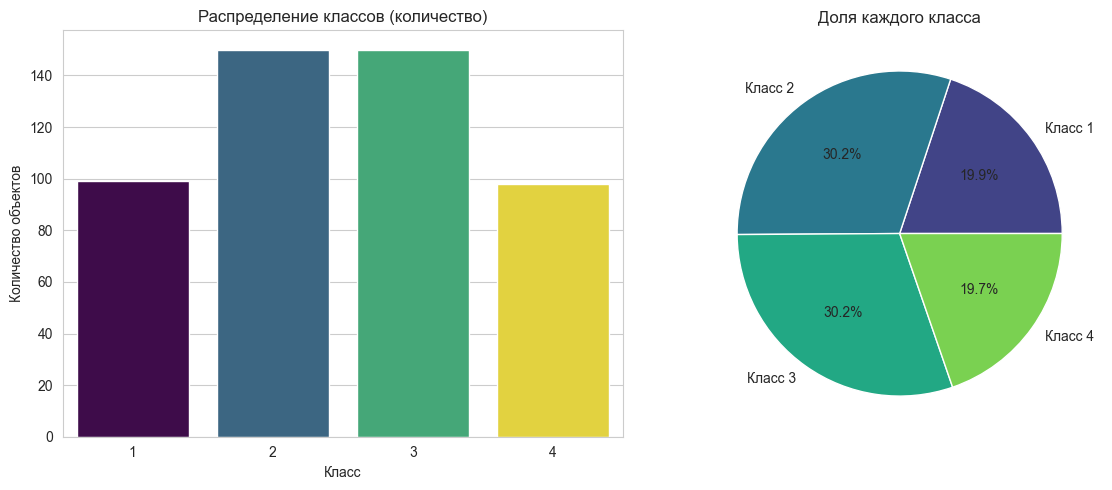

In [45]:
plt.figure(figsize=(12, 5))

# Исправленный countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean, x='label', hue='label', palette='viridis', legend=False)
plt.title('Распределение классов (количество)')
plt.xlabel('Класс')
plt.ylabel('Количество объектов')

# Круговая диаграмма (без изменений)
plt.subplot(1, 2, 2)
class_counts = df_clean['label'].value_counts().sort_index()
plt.pie(class_counts,
        labels=[f'Класс {label}' for label in class_counts.index],
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Доля каждого класса')

plt.tight_layout()
plt.show()

## Шаг 5: Распределение признаков по классам

Проверка признаков на нормальность внутри каждого класса

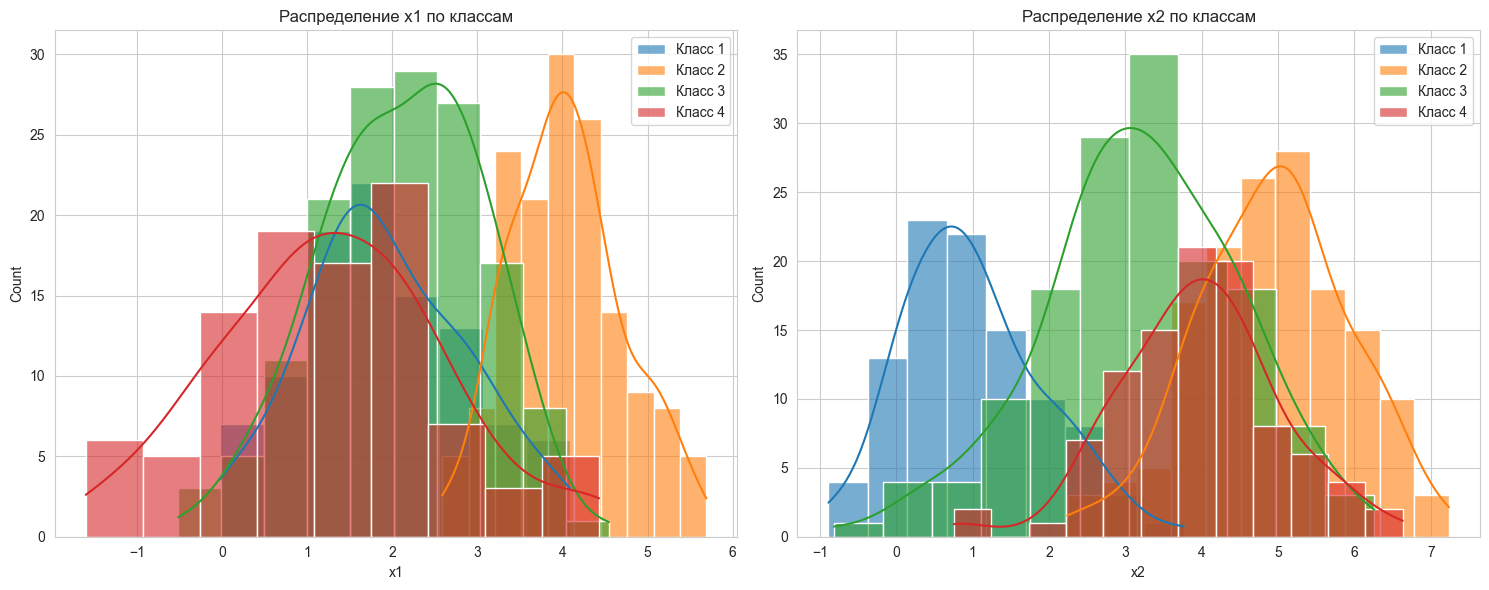

In [46]:
plt.figure(figsize=(15, 6))

for i, feature in enumerate(['x1', 'x2'], 1):
    plt.subplot(1, 2, i)
    for label in sorted(df_clean['label'].unique()):
        subset = df_clean[df_clean['label'] == label]
        sns.histplot(subset[feature], kde=True, label=f'Класс {label}', alpha=0.6)
    plt.title(f'Распределение {feature} по классам')
    plt.legend()
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

## Шаг 6: Выводы

На основе анализа данных можно сделать следующие выводы:
- **Объём выборки**: `497` строк, `3` столбца];
- **Число признаков**: `2` (`x1`, `x2`);
- **Целевая переменная**: `label` — дискретная, подходит для классификации;
- **Пропуски**: `нет пропусков`;
- **Распределения**:
    - `x1`: Нормальное;
    - `x2`: Нормальное;
- **Баланс классов**: Классы достаточно сбалансированы:
    - `1`: 99;
    - `2`: 150;
    - `3`: 150;
    - `4`: 98;
- **Выбросы**: Были удалены:
    - `№12`  `x1 =  2.2061` `x2 = -1.3102`  `label = 1`;
    - `№439` `x1 = -1.8735` `x2 =  3.6047`  `label = 4`;
    - `№442` `x1 = -1.9906` `x2 =  4.6795`  `label = 4`;

## Шаг 7. Сохранение предобработанной базы данных.

In [48]:
df.to_csv('../data/data_ml_cleaned.csv', index=False)
print("Данные сохранены в 'data_ml_cleaned.csv'")

Данные сохранены в 'data_ml_cleaned.csv'
